<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_11_CNN%EC%8B%A4%EC%A0%84_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.11 CNN실전 - 랜드마크 이미지

* 날짜:
* 이름:

## 학습내용
    - 랜드마크 데이터를 이용한 적절한 모델을 구축 및 학습한다.

### 소개

인공지능 기반의 컴퓨터 비전 기술 및 서비스 개발에 활용하기 위해 국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### 구축목적
AI 기술 및 응용서비스 개발에 활용가치가 높은 인공지능 학습용 데이터 구축 및 개방, AI응용 서비스 개발
국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### AI허브 링크
https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=56

## 실습
---

#### **데이터로드**
```
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download
```

In [ ]:
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt
To: /content/jejudo.zip
100% 4.35G/4.35G [00:17<00:00, 254MB/s]


In [ ]:
! unzip /content/jejudo.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 제주도에 8개 관광지를 맞추는 모델

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0/255.0, # 0~1로 스케일링
                               validation_split=0.2,
                               width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 180,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True,
                               vertical_flip=True,
                               brightness_range = [0.6, 1.4]
                               )
valid_gen = ImageDataGenerator(rescale=1.0/255.0, # 0~1로 스케일링
                               validation_split=0.2
                               )

In [ ]:
IMG_SHAPE = (180, 180)
BATCH_SIZE = 8
SEED = 123
dir_path = '/content/dataset'
# 같은 디렉토리에서 train-valid 나누고 싶다.
train_ds = train_gen.flow_from_directory(dir_path,
                                         target_size=IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset='training',
                                         seed = SEED
                                         )
valid_ds = valid_gen.flow_from_directory(dir_path,
                                         target_size=IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset='validation',
                                         seed = SEED
                                         )

Found 1065 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


(8, 180, 180, 3) (8, 8)


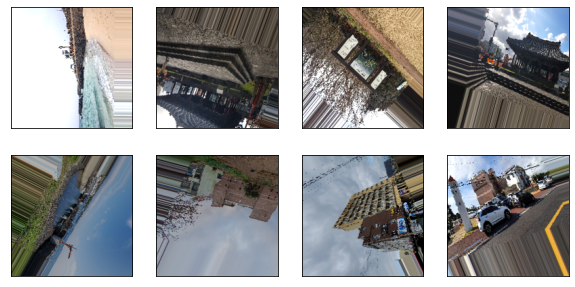

In [ ]:
import matplotlib.pyplot as plt

# imgs (batchsize, 180,180,3)
# labels 원-핫인코딩이 되어있다! 
plt.figure(figsize=(10,5))
for imgs, labels in train_ds:
  print(imgs.shape, labels.shape)
  for i in range(BATCH_SIZE):
    plt.subplot(2,4,i+1)
    plt.xticks([]);plt.yticks([])
    plt.imshow(imgs[i])
  break

## 모델 학습

In [ ]:
IMG_SHAPE+(3,)

(180, 180, 3)

In [ ]:
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=IMG_SHAPE+(3,)
                                                  )
base_model.summary()

In [ ]:
from tensorflow.keras import layers, models, utils, optimizers

In [ ]:
# GlobalAveragePooling  (None, 2560)
# Dropout
# Dense
def create_model(base_model):
  x = layers.Input(shape=IMG_SHAPE+(3,))
  y = base_model(x)
  y = layers.GlobalAvgPool2D()(y)
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(8, activation='softmax')(y)
  return models.Model(x,y)

model = create_model(base_model)
base_model.trainable = True
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=0.0002 ), # 학습률을 작게
              metrics=['acc']) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
___________________________________________

In [ ]:
from tensorflow.keras import callbacks

save_path = '/content/drive/MyDrive/eff_landmark'
tb = callbacks.TensorBoard(log_dir = f'{save_path}/tb_log')
ckp = callbacks.ModelCheckpoint(filepath=f'{save_path}/model.h5',
                                save_best_only=True,
                                monitor='val_acc'
                                )
TRAIN_STEP = train_ds.n // BATCH_SIZE
VALID_STEP = valid_ds.n // BATCH_SIZE
history = model.fit(train_ds, 
                    validation_data=valid_ds,
                    epochs=20,
                    shuffle=True,
                    callbacks=[tb, ckp],
                    # 계산하기
                    steps_per_epoch = TRAIN_STEP,
                    validation_steps = VALID_STEP,
                    )

Epoch 1/20
133/133 [==============================] - 266s 2s/step - loss: 0.4605 - acc: 0.8798 - val_loss: 2.3772 - val_acc: 0.1172
Epoch 2/20
133/133 [==============================] - 207s 2s/step - loss: 0.1147 - acc: 0.9622 - val_loss: 4.0779 - val_acc: 0.1250
Epoch 3/20
133/133 [==============================] - 208s 2s/step - loss: 0.0735 - acc: 0.9726 - val_loss: 2.1588 - val_acc: 0.3555
Epoch 4/20
133/133 [==============================] - 209s 2s/step - loss: 0.0610 - acc: 0.9782 - val_loss: 1.6212 - val_acc: 0.7383
Epoch 5/20
133/133 [==============================] - 208s 2s/step - loss: 0.0393 - acc: 0.9858 - val_loss: 0.1020 - val_acc: 0.9766
Epoch 6/20
133/133 [==============================] - 200s 2s/step - loss: 0.0641 - acc: 0.9792 - val_loss: 0.2689 - val_acc: 0.9375
Epoch 7/20
 65/133 [=============>................] - ETA: 1:23 - loss: 0.0601 - acc: 0.9788